<a href="https://colab.research.google.com/github/michaelthephoenix/python/blob/master/Image_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic classification: Classify images of clothing


https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.tensorflow.org%2Ftutorials%2Fkeras%2Fclassification

In [56]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


importing data

In [57]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

play

In [58]:
print(train_images.shape)

(60000, 28, 28)


In [59]:
len(train_labels)

60000

In [60]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

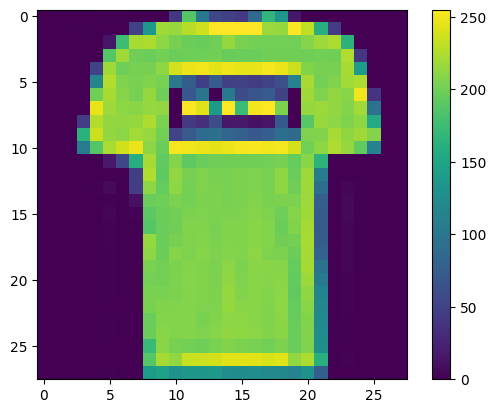

In [61]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [62]:
train_images = train_images / 255.0
test_images = test_images / 225.0

In [63]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

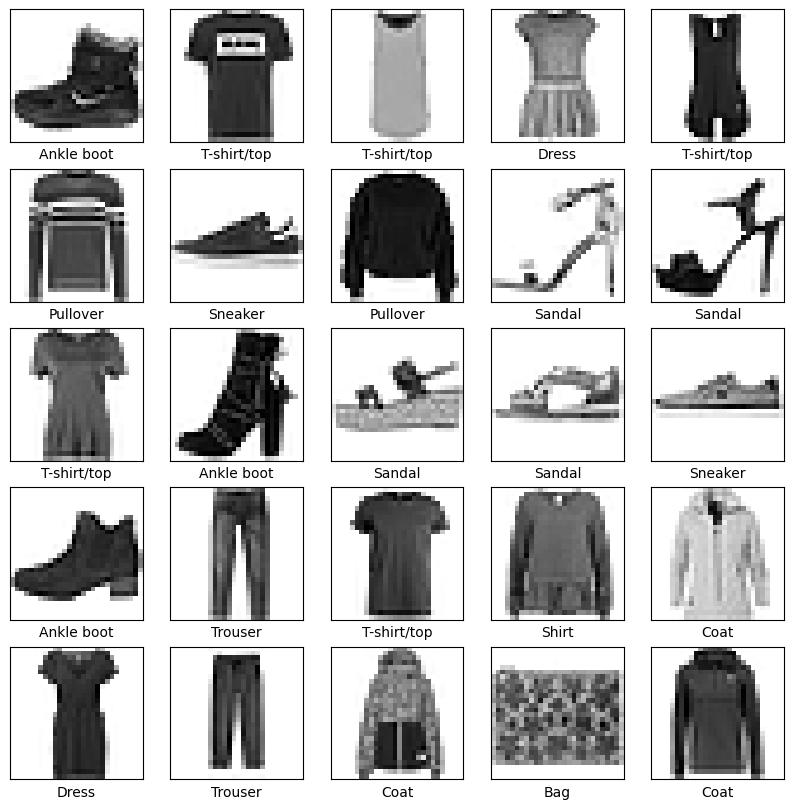

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Building model

In [65]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4977 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3766 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3401 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3168 - accuracy: 0.8828
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2965 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2821 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2596 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2483 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [68]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3410 - accuracy: 0.8833 - 737ms/epoch - 2ms/step

Test accuracy: 0.8833000063896179


Making Predictions

In [69]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [70]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [71]:
predictions[0]

array([7.0957138e-09, 5.7687657e-12, 9.3070265e-12, 1.0266920e-12,
       1.7641349e-09, 2.0987740e-05, 4.2777570e-10, 7.9163900e-03,
       2.2414540e-08, 9.9206269e-01], dtype=float32)

In [72]:
np.argmax(predictions[0])

9

In [73]:
test_labels[0]

9

In [81]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')




Verifying Predictions

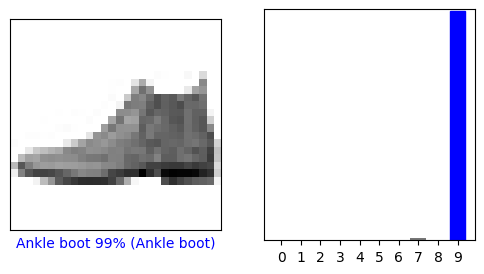

In [82]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

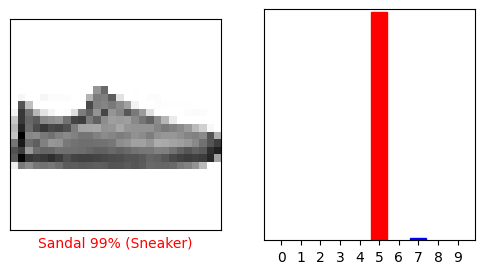

In [83]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

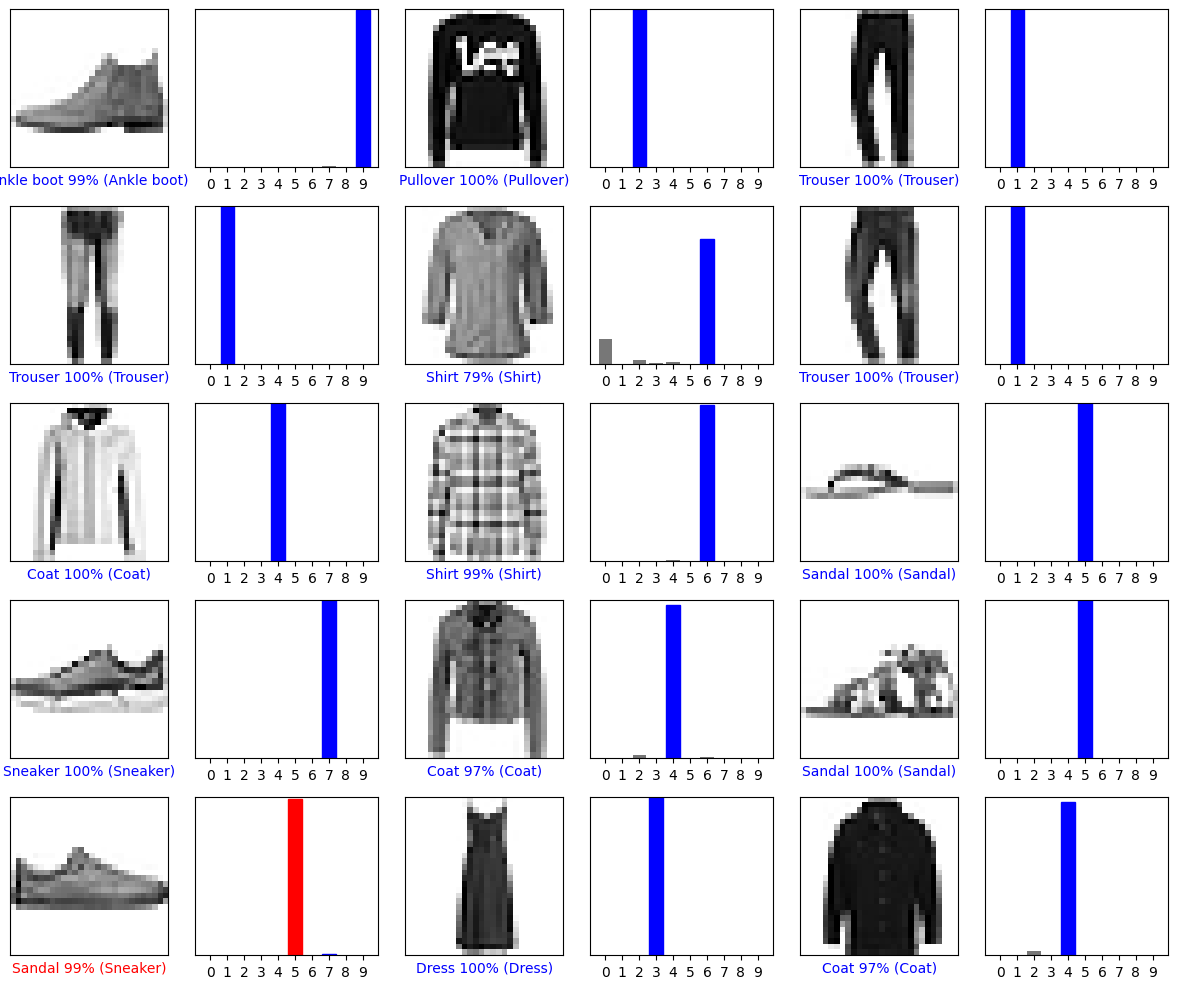

In [84]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Using the Model

In [85]:
# grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [87]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [88]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[1.09618195e-05 3.39386654e-14 9.97494698e-01 5.48447701e-14
  2.38524983e-03 4.11302191e-14 1.09205779e-04 6.99071177e-21
  7.03786751e-11 4.40698034e-16]]


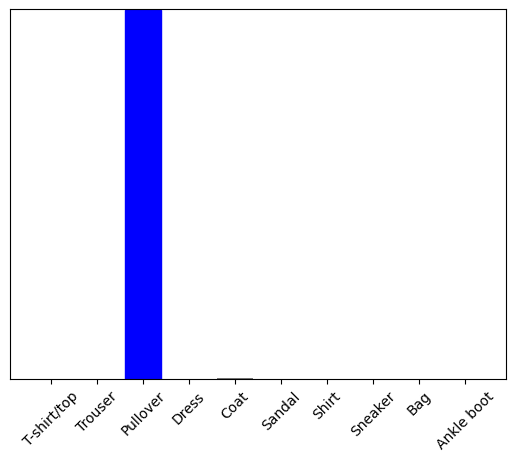

In [89]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [90]:
np.argmax(predictions_single[0])

2

Done